In [ ]:
# Autor: Larissa Lucena - Aluna - Unipê - Centro Universitário de João Pessoa
# Ciência de Dados com Python + Pandas, Numpy, SkLearning.
# Machine Learning - Aula 01

# Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [ ]:
# Loading the data on csv file in a df called 'passageiros'
passageiros = pd.read_csv('Passageiros.csv')

In [ ]:
# Show the first lines from df
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [ ]:
# Show the last lines from df
passageiros.tail()

,tempo,nPassageiros
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [ ]:
# Show the statistics about the df
passageiros.describe()

,tempo,nPassageiros
count,144.000000,144.000000
mean,1954.958333,280.298611
std,3.476109,119.966317
min,1949.000000,104.000000
25%,1951.979167,180.000000
50%,1954.958333,265.500000
75%,1957.937500,360.500000
max,1960.916667,622.000000


In [ ]:
# Using the libraries seaborn and matplotlib we could plot graphics to visualize the database
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='tempo', ylabel='nPassageiros'>

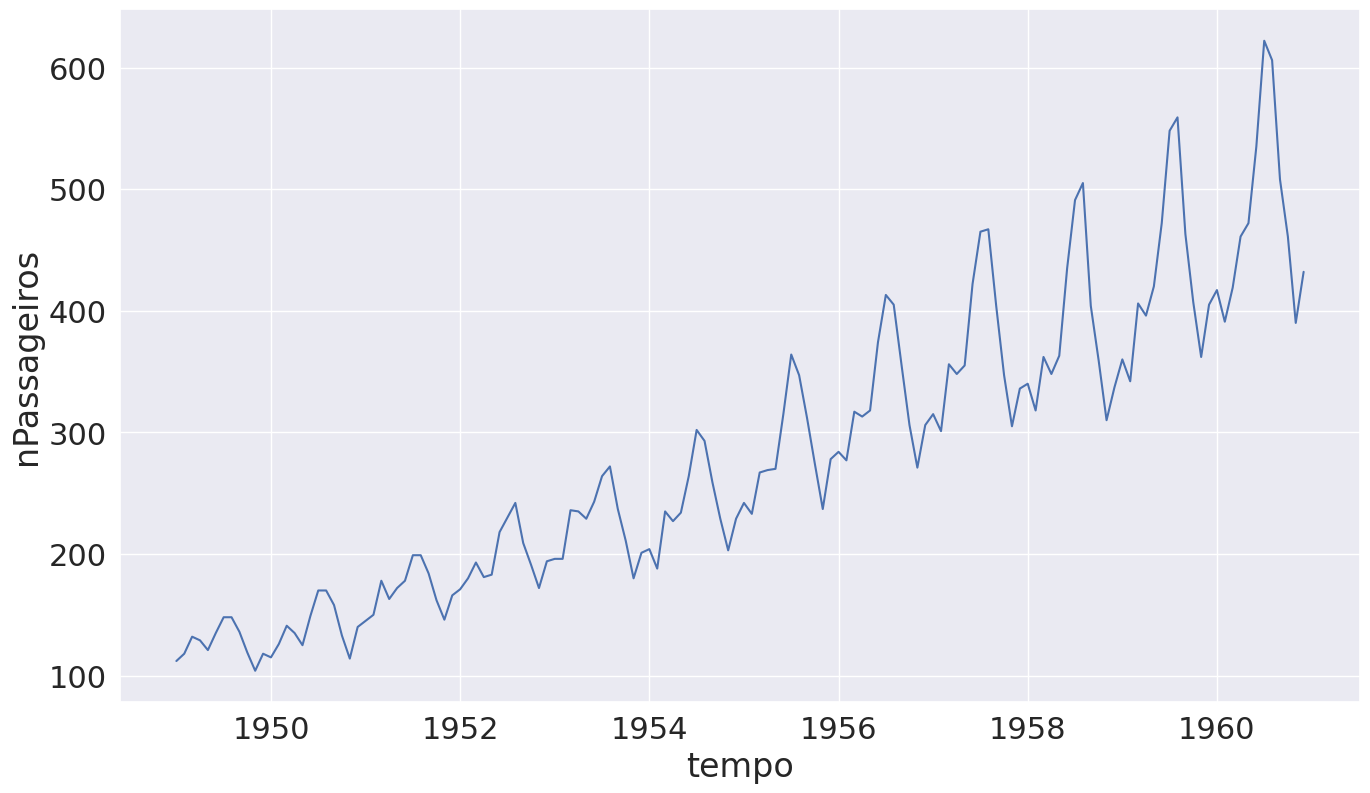

In [ ]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [ ]:
# Select all columns without the last one
tempo = passageiros.iloc[:,:-1].values

In [ ]:
nPassageiros = passageiros.iloc[:,1].values

In [ ]:
# Split part of the data in train and test
from sklearn.model_selection import train_test_split

In [ ]:
tempo_treino, tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(tempo, nPassageiros, test_size = 0.3)

In [ ]:
from sklearn import linear_model

In [ ]:
regressor = linear_model.LinearRegression()

In [ ]:
# Adjust the line to the train data
regressor.fit(tempo_treino, nPassageiros_treino)

LinearRegression()

In [ ]:
nPassageiros_predito = regressor.predict(tempo_teste)

In [ ]:
import numpy as np

In [ ]:
# Add the data to a DataFrame to later create a image using Seaborn
passageiros_predito = pd.DataFrame(
    {
        'Tempo': np.ndarray.flatten(tempo_teste),
        'nPassageiros': nPassageiros_predito,
    }
)
passageiros_teste = pd.DataFrame(
    {
        'Tempo': np.ndarray.flatten(tempo_teste),
        'nPassageiros': nPassageiros_teste,
    }
)

<Axes: xlabel='Tempo', ylabel='nPassageiros'>

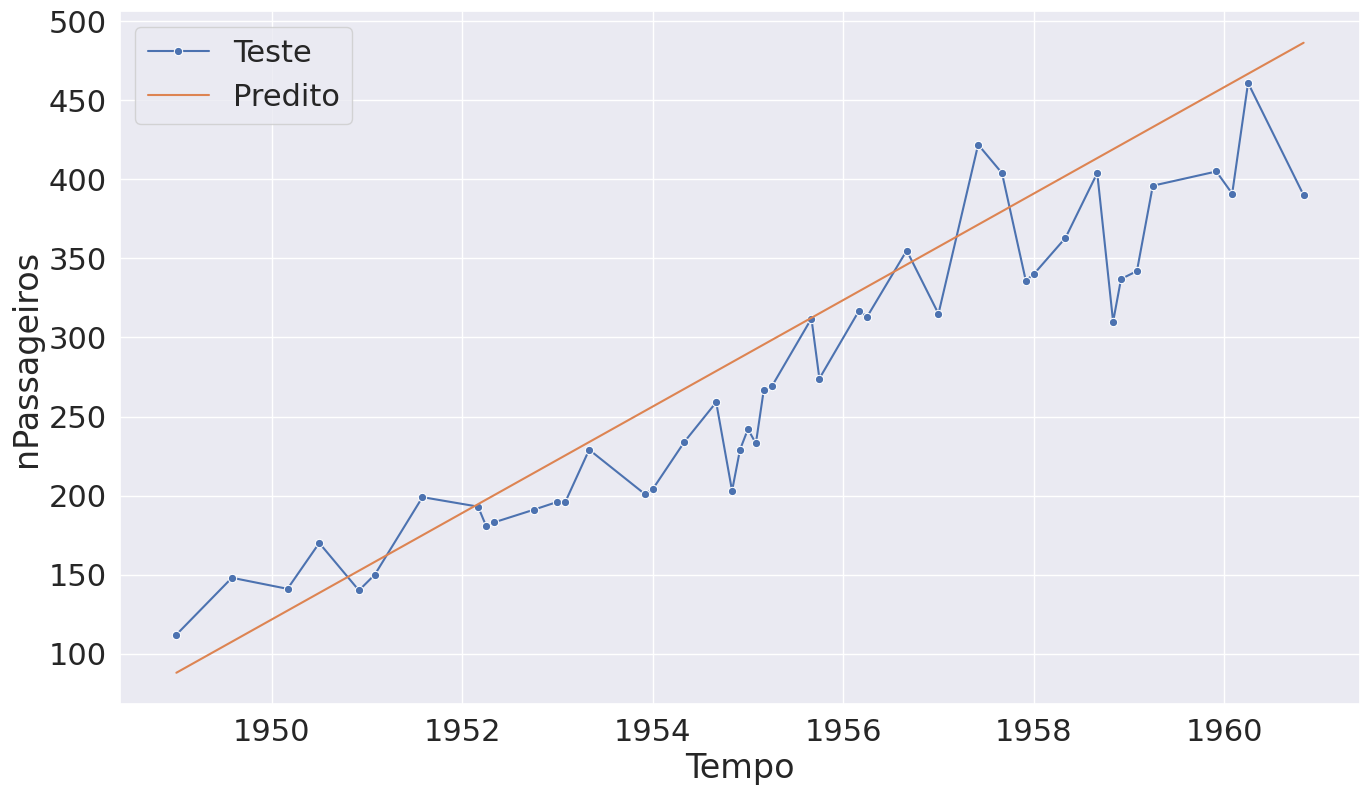

In [ ]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

In [ ]:
# Coeficientes
print('Coeficiente: \n', regressor.coef_)

Coeficiente: 
 [33.67801929]


In [ ]:
# MSE (mean square error)
print("MSE: %.2f" % np.mean((regressor.predict(tempo) - nPassageiros) ** 2))

# Variation score: 1 represents the perfect prediction
print('Score de variação: %.2f' % regressor.score(tempo, nPassageiros))

MSE: 2198.88
Score de variação: 0.85


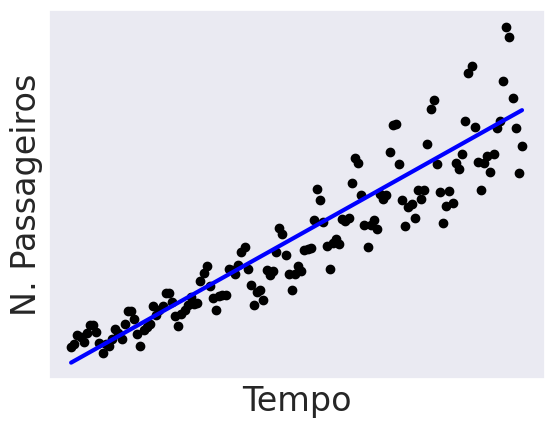

In [ ]:
# Scatter Plot represents the linear regression
plt.scatter(tempo, nPassageiros,  color = 'black')
plt.plot(tempo, regressor.predict(tempo), color = 'blue', linewidth = 3)
plt.xlabel('Tempo')
plt.ylabel('N. Passageiros')
plt.xticks(())
plt.yticks(())

plt.show()